# 2d plotting

## Standardized input

## Pandas and xarray integration

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
from string import ascii_lowercase
# DataArray
state = np.random.RandomState(51423)
data = 50*(np.sin(np.linspace(0, 2*np.pi, 20) + 0)**2) * \
    np.cos(np.linspace(0, np.pi, 20) + np.pi/2)[:, None]**2
da = xr.DataArray(data, dims=('plev', 'lat'), coords={
    'plev': xr.DataArray(np.linspace(1000, 0, 20), dims=('plev',), attrs={'long_name': 'pressure', 'units': 'hPa'}),
    'lat': xr.DataArray(np.linspace(-90, 90, 20), dims=('lat',), attrs={'units': 'degN'}),
}, name='u', attrs={'long_name': 'zonal wind', 'units': 'm/s'})
# DataFrame
data = state.rand(20, 20)
df = pd.DataFrame(data.cumsum(axis=0).cumsum(
    axis=1), index=[*'JFMAMJJASONDJFMAMJJA'])
df.name = 'temporal data'
df.index.name = 'index'
df.columns.name = 'time (days)'

In [ ]:
import proplot as plot
f, axs = plot.subplots(nrows=2, axwidth=2.2, share=0)
axs.format(collabels=['Automatic subplot formatting'])
# Plot DataArray
axs[0].contourf(da, cmap='Greens', cmap_kw={
                'left': 0.05}, colorbar='l', linewidth=0.7, color='gray7')
axs[0].format(yreverse=True)
# Plot DataFrame
axs[1].contourf(df, cmap='Blues', colorbar='r', linewidth=0.7, color='gray7')
axs[1].format(xtickminor=False)

## On-the-fly colormaps

## Colormap levels

In [ ]:
import proplot as plot
import numpy as np
f, axs = plot.subplots(ncols=2, axwidth=2)
cmap = 'spectral'
state = np.random.RandomState(51423)
data = (state.normal(0, 1, size=(33, 33))).cumsum(axis=0).cumsum(axis=1)
axs.format(suptitle='Pcolor with levels demo')
ax = axs[0]
ax.pcolor(data, cmap=cmap, N=200, symmetric=True, colorbar='l')
ax.format(title='Ambiguous values', yformatter='null')
ax = axs[1]
ax.pcolor(data, cmap=cmap, N=10, symmetric=True, colorbar='r')
ax.format(title='Discernible levels')

In [ ]:
import proplot as plot
import numpy as np
f, axs = plot.subplots([[0, 0, 1, 1, 0, 0], [2, 3, 3, 4, 4, 5]],
                       wratios=(1.5, 0.5, 1, 1, 0.5, 1.5), axwidth=1.7, ref=1, right='2em')
axs.format(suptitle='Demo of colorbar color-range standardization')
levels = plot.arange(0, 360, 45)
state = np.random.RandomState(51423)
data = (20*(state.rand(20, 20) - 0.4).cumsum(axis=0).cumsum(axis=1)) % 360
# Show cyclic colorbar with distinct end colors
ax = axs[0]
ax.pcolormesh(data, levels=levels, cmap='phase',
              extend='neither', colorbar='b')
ax.format(title='cyclic colormap\nwith distinct end colors')
# Show colorbars with different extend values
for ax, extend in zip(axs[1:], ('min', 'max', 'neither', 'both')):
    ax.pcolormesh(data[:, :10], levels=levels, cmap='oxy',
                  extend=extend, colorbar='b', colorbar_kw={'locator': 90})
    ax.format(title=f'extend={extend!r}')

##  Colormap normalizers

In [ ]:
import proplot as plot
import numpy as np
f, axs = plot.subplots(ncols=2, axwidth=2.5, aspect=1.5)
state = np.random.RandomState(51423)
data = 10**(2*state.rand(20, 20).cumsum(axis=0)/7)
ticks = [5, 10, 20, 50, 100, 200, 500, 1000]
for i, (norm, title) in enumerate(zip(('linear', 'segments'), ('Linear normalizer', 'LinearSegmentedNorm'))):
    m = axs[i].contourf(data, levels=ticks, extend='both',
                        cmap='Mako', norm=norm, colorbar='b')
    axs[i].format(title=title)
axs.format(suptitle='Level normalizers demo')

In [ ]:
import proplot as plot
import numpy as np
state = np.random.RandomState(51423)
data1 = (state.rand(20, 20) - 0.43).cumsum(axis=0)
data2 = (state.rand(20, 20) - 0.57).cumsum(axis=0)
f, axs = plot.subplots(ncols=2, axwidth=2.5, aspect=1.5)
cmap = plot.Colormap('Moisture', cut=0.1)
axs.format(suptitle='Midpoint normalizer demo')
axs[0].contourf(data1, norm='midpoint', cmap=cmap, colorbar='b')
axs[0].format(title='Skewed positive data')
axs[1].contourf(data2, norm='midpoint', cmap=cmap, colorbar='b')
axs[1].format(title='Skewed negative data')

## Pcolor and contour labels

In [ ]:
import proplot as plot
import pandas as pd
import numpy as np
# Heatmap with labels
f, axs = plot.subplots([[1, 1, 2, 2], [0, 3, 3, 0]],
                       axwidth=2, share=1, span=False, hratios=(1, 0.9))
state = np.random.RandomState(51423)
data = state.rand(6, 6)
data = pd.DataFrame(data, index=pd.Index(['a', 'b', 'c', 'd', 'e', 'f']))
axs.format(xlabel='xlabel', ylabel='ylabel', suptitle='Labels demo')
ax = axs[0]
m = ax.heatmap(data, cmap='rocket', labels=True,
               precision=2, labels_kw={'weight': 'bold'})
ax.format(title='Heatmap plot with labels')
# Filled contours with labels
ax = axs[1]
m = ax.contourf(data.cumsum(axis=0), labels=True,
                cmap='rocket', labels_kw={'weight': 'bold'})
ax.format(title='Filled contour plot with labels')
# Simple contour plot
ax = axs[2]
ax.contour(data.cumsum(axis=1) - 2, color='gray8',
           labels=True, lw=2, labels_kw={'weight': 'bold'})
ax.format(title='Contour plot with labels')

## Heatmaps and covariance matrices

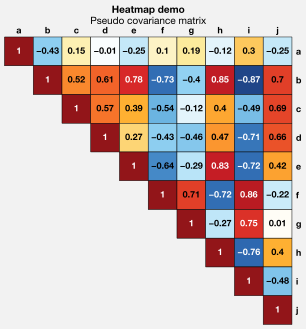

In [9]:
import proplot as plot
import numpy as np
import pandas as pd
f, ax = plot.subplots(axwidth=4)
state = np.random.RandomState(51423)
data = state.normal(size=(10, 10)).cumsum(axis=0)
data = (data - data.mean(axis=0)) / data.std(axis=0)
data = (data.T @ data) / data.shape[0]
data[np.tril_indices(data.shape[0], -1)] = np.nan  # fill half with empty boxes
data = pd.DataFrame(data, columns=list('abcdefghij'), index=list('abcdefghij'))
m = ax.heatmap(data, cmap='ColdHot', vmin=-1, vmax=1, N=100,
               lw=0.5, edgecolor='k', labels=True, labels_kw={'weight': 'bold'},
               clip_on=False)  # turn off clipping so box edges are not cut in half
ax.format(suptitle='Heatmap demo', title='Pseudo covariance matrix', alpha=0, linewidth=0,
          ytickmajorpad=4, # the ytick.major.pad rc setting; add extra space
          xloc='top', yloc='right', yreverse=True, ticklabelweight='bold')